*Python Machine Learning 3rd Edition* by [Sebastian Raschka](https://sebastianraschka.com) & [Vahid Mirjalili](http://vahidmirjalili.com), Packt Publishing Ltd. 2019

Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/LICENSE.txt)

Chapter 14: Going Deeper -- the Mechanics of TensorFlow
====

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Migrating from TF version 1

In [2]:
## TF-v1.x style
g = tf.Graph()
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    z = 2*(a-b) + c
    
with tf.compat.v1.Session(graph=g) as sess:
    print('Result:  z=', sess.run(z))
    print('Result:  z=', z.eval())

Result:  z= 1
Result:  z= 1


In [3]:
## TF v2 style
a = tf.constant(1, name='a')
b = tf.constant(2, name='b')
c = tf.constant(3, name='c')

z = 2*(a - b) + c
tf.print('Result:  z=', z)

Result:  z= 1


In [4]:
## TF-v1.x style
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_a')
    b = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_b')
    c = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_c')
    z = 2*(a-b) + c
    
with tf.compat.v1.Session(graph=g) as sess:
    feed_dict={a:1, b:2, c:3}
    print('Result:  z=', sess.run(z, feed_dict=feed_dict))

Result:  z= 1


In [5]:
## TF-v2 style
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('Scalar Inputs: ', compute_z(1, 2, 3))
tf.print('Rank 1 Inputs: ', compute_z([1], [2], [3]))
tf.print('Rank 2 Inputs: ', compute_z([[1]], [[2]], [[3]]))

Scalar Inputs:  1
Rank 1 Inputs:  [1]
Rank 2 Inputs:  [[1]]


In [6]:
@tf.function
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('Scalar Inputs: ', compute_z(1, 2, 3))
tf.print('Rank 1 Inputs: ', compute_z([1], [2], [3]))
tf.print('Rank 2 Inputs: ', compute_z([[1]], [[2]], [[3]]))

Scalar Inputs:  1
Rank 1 Inputs:  [1]
Rank 2 Inputs:  [[1]]


In [7]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None], dtype=tf.int32),
                              tf.TensorSpec(shape=[None], dtype=tf.int32),
                              tf.TensorSpec(shape=[None], dtype=tf.int32),))
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('Rank 1 Inputs: ', compute_z([1], [2], [3]))
tf.print('Rank 1 Inputs: ', compute_z([1, 2], [2, 4], [3, 6]))

Rank 1 Inputs:  [1]
Rank 1 Inputs:  [1 2]


In [ ]:
## we expect this to result in an error
tf.print('Rank 2 Inputs: ', compute_z([[1], [2]], [[2], [4]], [[3], [6]]))


## >> Error:
#ValueError: Python inputs incompatible with input_signature: 
#inputs (([[1], [2]], [[2], [4]], [[3], [6]])), input_signature 
#((TensorSpec(shape=(None,), dtype=tf.int32, name=None), 
#  TensorSpec(shape=(None,), dtype=tf.int32, name=None), 
#  TensorSpec(shape=(None,), dtype=tf.int32, name=None)))

In [9]:
tf.TensorSpec(shape=[None], dtype=tf.int32)

TensorSpec(shape=(None,), dtype=tf.int32, name=None)

## Variables

In [8]:
a = tf.Variable(initial_value=3.14, name='var_a')
b = tf.Variable(initial_value=[1, 2, 3], name='var_b')
c = tf.Variable(initial_value=[True, False], dtype=tf.bool)
d = tf.Variable(initial_value=["abc"], dtype=tf.string)
print(a)
print(b)
print(c)
print(d)

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>
<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=bool, numpy=array([ True, False])>
<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'abc'], dtype=object)>


In [9]:
a.trainable

True

In [10]:
w = tf.Variable([1, 2, 3], trainable=False)

print(w.trainable)

False


In [12]:
print(w.assign([3, 1, 4], read_value=True))
w.assign_add([2, -1, 2], read_value=False)

print(w.value())

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 1, 4], dtype=int32)>
tf.Tensor([5 0 6], shape=(3,), dtype=int32)


In [17]:
tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal()

tf.print(init(shape=(3,)))

[-0.722795904 1.01456821 0.251808226]


In [18]:
v = tf.Variable(init(shape=(2, 3)))
tf.print(v)

[[0.28982234 -0.782292783 -0.0453658961]
 [0.960991383 -0.120003454 0.708528221]]


In [19]:
class MyModule(tf.Module):
    def __init__(self):
        init = tf.keras.initializers.GlorotNormal()
        self.w1 = tf.Variable(init(shape=(2, 3)), trainable=True)
        self.w2 = tf.Variable(init(shape=(1, 2)), trainable=False)
                
m = MyModule()
print('All module variables: ', [v.shape for v in m.variables])
print('Trainable variable:   ', [v.shape for v in
                                 m.trainable_variables])


All module variables:  [TensorShape([2, 3]), TensorShape([1, 2])]
Trainable variable:    [TensorShape([2, 3])]


### Variables with tf.function

In [ ]:
## this will produce an error
## ==> you cannot create a varibale inside a
##     decorated function

@tf.function
def f(x):
    w = tf.Variable([1, 2, 3])

f([1])

## ==> results in error
## ValueError: tf.function-decorated function tried to create variables on non-first call.

In [24]:
import tensorflow as tf

#tf.random.set_seed(1)
w = tf.Variable(tf.random.uniform((3, 3)))

@tf.function
def compute_z(x):    
    return tf.matmul(w, x)

x = tf.constant([[1], [2], [3]], dtype=tf.float32)
tf.print(compute_z(x))

[[2.62276983]
 [3.40736914]
 [3.00806189]]


## Computing gradients

### GradientTape

In [25]:
import tensorflow as tf

w = tf.Variable(1.0)
b = tf.Variable(0.5)
print(w.trainable, b.trainable)

x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])

with tf.GradientTape() as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dw = tape.gradient(loss, w)

tf.print('dL/dw : ', dloss_dw)

True True
dL/dw :  -0.559999764


In [26]:
# verifying the computed gradient
tf.print(2*x*(w*x+b-y))

[-0.559999764]


### Gradients of non-variables: `tape.watch()`

In [27]:

with tf.GradientTape() as tape:
    tape.watch(x)
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.square(y - z)

dloss_dx = tape.gradient(loss, x)

tf.print('dL/dx : ', dloss_dx)

dL/dx :  [-0.399999857]


In [28]:
# verifying the computed gradient
tf.print(2*w*(w*x+b-y))

[-0.399999857]


### Multiple gradients in one forward call `persistent=True`

In [29]:
with tf.GradientTape(persistent=True) as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dw = tape.gradient(loss, w)
dloss_db = tape.gradient(loss, b)

tf.print('dL/dw : ', dloss_dw)
tf.print('dL/db : ', dloss_db)

dL/dw :  -0.559999764
dL/db :  -0.399999857


### Updating variables: `optimizer.apply_gradients()`

In [30]:
optimizer = tf.keras.optimizers.SGD()

optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w, b]))

tf.print('Updated w: ', w)
tf.print('Updated bias: ', b)

Updated w:  1.0056
Updated bias:  0.504


## Keras API

In [1]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

## late variable creation
model.build(input_shape=(None, 4))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  80        
_________________________________________________________________
dense_1 (Dense)              multiple                  544       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [2]:

## printing variables of the model
for v in model.variables:
    print('{:20s}'.format(v.name), v.trainable, v.shape)

dense/kernel:0       True (4, 16)
dense/bias:0         True (16,)
dense_1/kernel:0     True (16, 32)
dense_1/bias:0       True (32,)


### Configuring layers

 * Keras Initializers `tf.keras.initializers`: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/initializers  
 * Keras Regularizers `tf.keras.regularizers`: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/regularizers  
 * Activations `tf.keras.activations`: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/activations  

In [3]:
model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=16, 
        activation=tf.keras.activations.relu,
        kernel_initializer=tf.keras.initializers.GlorotNormal(),
        bias_initializer=tf.keras.initializers.Constant(2.0)
    ))

model.add(
    tf.keras.layers.Dense(
        units=32, 
        activation=tf.keras.activations.sigmoid,
        kernel_regularizer=tf.keras.regularizers.l1
    ))

model.build(input_shape=(None, 4))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  80        
_________________________________________________________________
dense_3 (Dense)              multiple                  544       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


### Compiling a model

 * Keras Optimizers `tf.keras.optimizers`:  https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/optimizers
 * Keras Loss Functins `tf.keras.losses`: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses
 * Keras Metrics `tf.keras.metrics`: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/metrics

In [4]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.Accuracy(), 
             tf.keras.metrics.Precision(),
             tf.keras.metrics.Recall(),])

## XOR-example

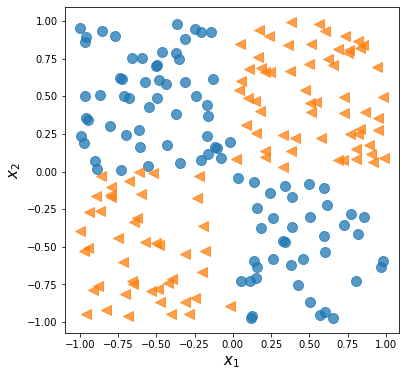

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(1)
np.random.seed(1)

x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], 
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [2]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(2,), 
                                activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [4]:
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

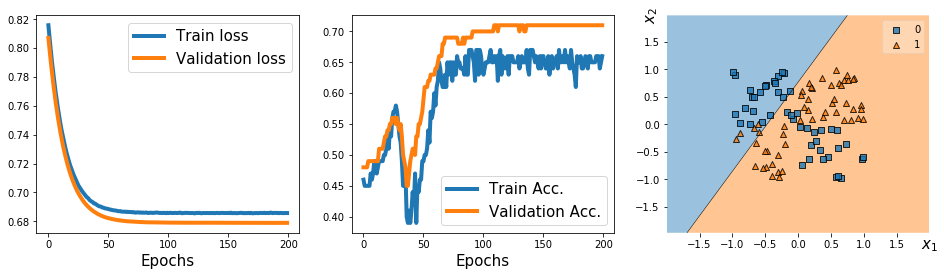

In [5]:
from mlxtend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [6]:
tf.random.set_seed(1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

## compile:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## train:
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


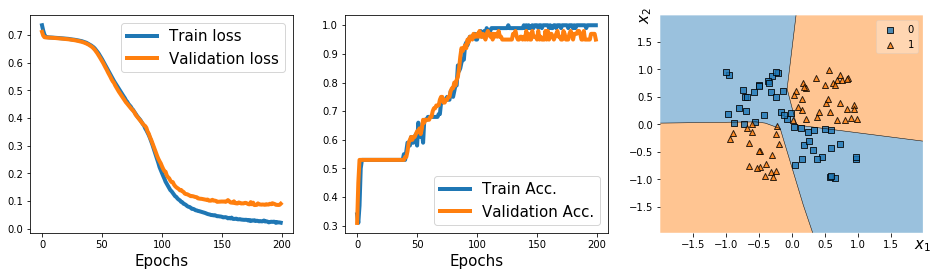

In [7]:
history = hist.history

from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

## Building complex models 

### Using Keras functional API

 * For building mroe complex models, with multiple inputs, multiple outputs,, fusion, etc.

In [8]:
tf.random.set_seed(1)

## input layer:
inputs = tf.keras.Input(shape=(2,))

## hidden layers
h1 = tf.keras.layers.Dense(4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(4, activation='relu')(h2)

## output:
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(h3)

## construct a model:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


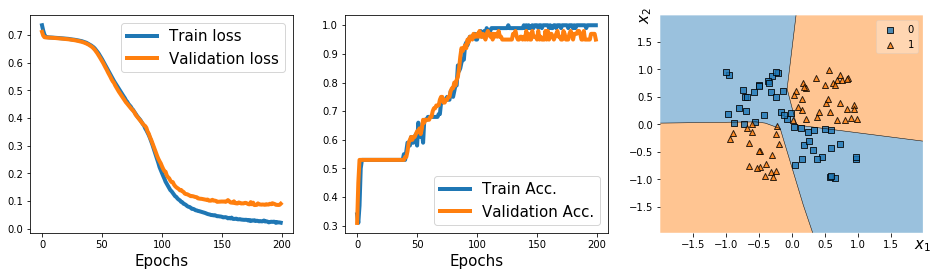

In [9]:
## compile:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## train:
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

## Plotting
history = hist.history

from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

### Subclassing `tf.keras.Model`

 * define `__init__()`
 * define `call()`

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             multiple                  12        
_________________________________________________________________
dense_18 (Dense)             multiple                  20        
_________________________________________________________________
dense_19 (Dense)             multiple                  20        
_________________________________________________________________
dense_20 (Dense)             multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


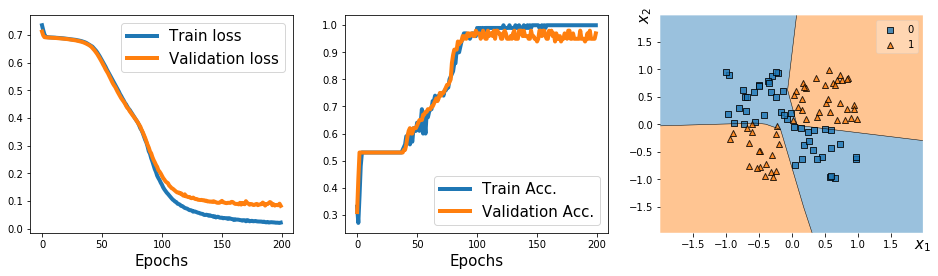

In [26]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(4, activation='relu')
        self.hidden_2 = tf.keras.layers.Dense(4, activation='relu')
        self.hidden_3 = tf.keras.layers.Dense(4, activation='relu')
        self.outputs = tf.keras.layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)
        return self.outputs(h)
    
tf.random.set_seed(1)

## testing:
model = MyModel()
model.build(input_shape=(None, 2))

model.summary()

## compile:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## train:
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

## Plotting
history = hist.history

from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [ ]:
model.get_config()

### Customizing Keras Layers

 * Define `__init__()`
 * Define `build()` for late-variable creation
 * Define `call()`
 * Define `get_config()` for serialization

In [2]:
import tensorflow as tf

class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, output_dim, noise_stddev=0.1, **kwargs):
        self.output_dim = output_dim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w = self.add_weight(name='weights',
                                 shape=(input_shape[1], self.output_dim),
                                 initializer='random_normal',
                                 trainable=True)
        
        self.b = self.add_weight(shape=(self.output_dim,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs, training=None):
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(shape=(batch, dim),
                                     mean=0.0,
                                     stddev=self.noise_stddev)

            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        z = tf.matmul(noisy_inputs, self.w) + self.b
        return tf.keras.activations.relu(z)
    
    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'output_dim': self.output_dim,
                       'noise_stddev': self.noise_stddev})
        return config


## testing:

tf.random.set_seed(1)

noisy_layer = NoisyLinear(4)
noisy_layer.build(input_shape=(None, 4))

x = tf.zeros(shape=(1, 4))
tf.print(noisy_layer(x, training=True))

## re-building from config:
config = noisy_layer.get_config()
new_layer = NoisyLinear.from_config(config)
tf.print(new_layer(x, training=True))

[[0 0.00821428 0 0]]
[[0 0.0108502861 0 0]]


W0711 10:30:12.170183 140034806978304 deprecation.py:323] From /home/vahid/anaconda3/envs/tf2.0-beta/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
noisy_linear_1 (NoisyLinear) multiple                  12        
_________________________________________________________________
dense (Dense)                multiple                  20        
_________________________________________________________________
dense_1 (Dense)              multiple                  20        
_________________________________________________________________
dense_2 (Dense)              multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


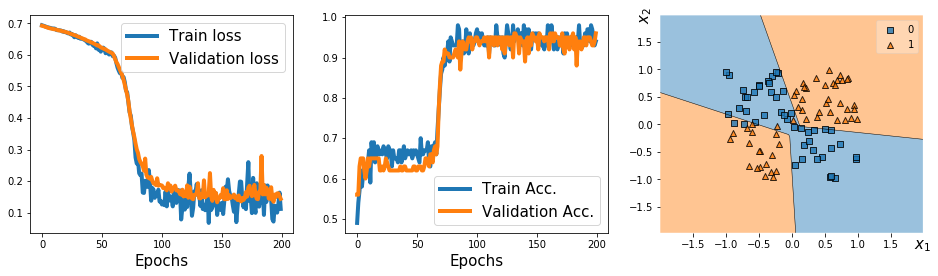

In [3]:
tf.random.set_seed(1)

model = tf.keras.Sequential([
    NoisyLinear(4, noise_stddev=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.build(input_shape=(None, 2))
model.summary()

## compile:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## train:
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, 
                 verbose=0)

## Plotting
history = hist.history

from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

## Estimators

### Pre-made estimators

 * **Step 1:** Define the input function for importing the data   
 * **Step 2:**  Define the feature columns to bridge between the estimator and the data   
 * **Step 3:** Instantiate an estimator or convert a Keras model to an estimator   
 * **Step 4:** Use the estimator: train() evaluate() predict()   

### Feature Columns


 * See definition: https://developers.google.com/machine-learning/glossary/#feature_columns
 * Documentation: https://www.tensorflow.org/api_docs/python/tf/feature_column

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

tf.random.set_seed(1)
np.random.seed(1)

In [2]:
dataset_path = tf.keras.utils.get_file("auto-mpg.data", 
                                       ("http://archive.ics.uci.edu/ml/machine-learning-databases"
                                        "/auto-mpg/auto-mpg.data"))

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
                'Weight', 'Acceleration', 'ModelYear', 'Origin']

df = pd.read_csv(dataset_path, names=column_names,
                 na_values = "?", comment='\t',
                 sep=" ", skipinitialspace=True)

df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [3]:
print(df.isna().sum())

df = df.dropna()

df = df.reset_index(drop=True)

df.tail()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1
391,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
import sklearn
import sklearn.model_selection

df_train, df_test = sklearn.model_selection.train_test_split(df, train_size=0.8)


train_stats = df_train.describe().transpose()

train_stats

,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.404153,7.666909,9.0,17.5,23.0,29.0,46.6
Cylinders,313.0,5.402556,1.701506,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,189.512780,102.675646,68.0,104.0,140.0,260.0,455.0
Horsepower,313.0,102.929712,37.919046,46.0,75.0,92.0,120.0,230.0
Weight,313.0,2961.198083,848.602146,1613.0,2219.0,2755.0,3574.0,5140.0
Acceleration,313.0,15.704473,2.725399,8.5,14.0,15.5,17.3,24.8
ModelYear,313.0,75.929712,3.675305,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.591054,0.807923,1.0,1.0,1.0,2.0,3.0


In [5]:
numeric_column_names = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']

df_train_norm, df_test_norm = df_train.copy(), df_test.copy()

for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean']
    std  = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name] - mean)/std
    df_test_norm.loc[:, col_name] = (df_test_norm.loc[:, col_name] - mean)/std
    
df_train_norm.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
203,28.0,-0.824303,-0.901020,-0.736562,-0.950031,0.255202,76,3
255,19.4,0.351127,0.413800,-0.340982,0.293190,0.548737,78,1
72,13.0,1.526556,1.144256,0.713897,1.339617,-0.625403,72,1
235,30.5,-0.824303,-0.891280,-1.053025,-1.072585,0.475353,77,1
37,14.0,1.526556,1.563051,1.636916,1.470420,-1.359240,71,1


#### Numeric Columns

In [6]:

numeric_features = []

for col_name in numeric_column_names:
    numeric_features.append(tf.feature_column.numeric_column(key=col_name))
    
numeric_features

[NumericColumn(key='Cylinders', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Displacement', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Horsepower', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Acceleration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [7]:
feature_year = tf.feature_column.numeric_column(key="ModelYear")

bucketized_features = []

bucketized_features.append(tf.feature_column.bucketized_column(
    source_column=feature_year,
    boundaries=[73, 76, 79]))

print(bucketized_features)

[BucketizedColumn(source_column=NumericColumn(key='ModelYear', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(73, 76, 79))]


In [8]:

feature_origin = tf.feature_column.categorical_column_with_vocabulary_list(
    key='Origin',
    vocabulary_list=[1, 2, 3])


categorical_indicator_features = []
categorical_indicator_features.append(tf.feature_column.indicator_column(feature_origin))

print(categorical_indicator_features)

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Origin', vocabulary_list=(1, 2, 3), dtype=tf.int64, default_value=-1, num_oov_buckets=0))]


In [9]:
def train_input_fn(df_train, batch_size=8):
    df = df_train.copy()
    train_x, train_y = df, df.pop('MPG')
    dataset = tf.data.Dataset.from_tensor_slices((dict(train_x), train_y))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

## inspection:
ds = train_input_fn(df_train_norm)
batch = next(iter(ds))
print('Keys :: ', batch[0].keys())
print('Batch Model Years :: ', batch[0]['ModelYear'])

Keys ::  dict_keys(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'ModelYear', 'Origin'])
Batch Model Years ::  tf.Tensor([82 78 76 72 78 73 70 78], shape=(8,), dtype=int32)


In [10]:
all_feature_columns = (numeric_features + 
                       bucketized_features + 
                       categorical_indicator_features)

print(all_feature_columns)

[NumericColumn(key='Cylinders', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Displacement', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Horsepower', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Acceleration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), BucketizedColumn(source_column=NumericColumn(key='ModelYear', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(73, 76, 79)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Origin', vocabulary_list=(1, 2, 3), dtype=tf.int64, default_value=-1, num_oov_buckets=0))]


In [11]:

regressor = tf.estimator.DNNRegressor(
    feature_columns=all_feature_columns,
    hidden_units=[32, 10],
    model_dir='models/autompg-dnnregressor/')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models/autompg-dnnregressor/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fea703759d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [12]:
EPOCHS = 1000
BATCH_SIZE = 8
total_steps = EPOCHS * int(np.ceil(len(df_train) / BATCH_SIZE))
print('Training Steps: ', total_steps)

regressor.train(
    input_fn=lambda:train_input_fn(df_train_norm, batch_size=BATCH_SIZE),
    steps=total_steps)


Training Steps:  40000
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new

In [13]:
reloaded_regressor = tf.estimator.DNNRegressor(
    feature_columns=all_feature_columns,
    hidden_units=[32, 10],
    warm_start_from='models/autompg-dnnregressor/',
    model_dir='models/autompg-dnnregressor/')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models/autompg-dnnregressor/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fea70321050>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
def eval_input_fn(df_test, batch_size=8):
    df = df_test.copy()
    test_x, test_y = df, df.pop('MPG')
    dataset = tf.data.Dataset.from_tensor_slices((dict(test_x), test_y))

    return dataset.batch(batch_size)

eval_results = reloaded_regressor.evaluate(
    input_fn=lambda:eval_input_fn(df_test_norm, batch_size=8))

for key in eval_results:
    print('{:15s} {}'.format(key, eval_results[key]))
    
print('Average-Loss {:.4f}'.format(eval_results['average_loss']))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-06T17:55:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models/autompg-dnnregressor/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-06-17:55:16
INFO:tensorflow:Saving dict for global step 40000: average_loss = 15.186558, global_step = 40000, label/mean 

In [15]:


pred_res = regressor.predict(input_fn=lambda: eval_input_fn(df_test_norm, batch_size=8))

print(next(iter(pred_res)))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models/autompg-dnnregressor/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'predictions': array([23.747658], dtype=float32)}


#### Boosted Tree Regressor

In [18]:

boosted_tree = tf.estimator.BoostedTreesRegressor(
    feature_columns=all_feature_columns,
    n_batches_per_layer=20,
    n_trees=200)

boosted_tree.train(
    input_fn=lambda:train_input_fn(df_train_norm, batch_size=BATCH_SIZE))

eval_results = boosted_tree.evaluate(
    input_fn=lambda:eval_input_fn(df_test_norm, batch_size=8))

print(eval_results)

print('Average-Loss {:.4f}'.format(eval_results['average_loss']))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpos_6ksrf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fea70138e10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done c

### Estimator -- MNIST dataset

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20
steps_per_epoch = np.ceil(60000 / BATCH_SIZE)

In [3]:
def preprocess(item):
    image = item['image']
    label = item['label']
    image = tf.image.convert_image_dtype(
        image, tf.float32)
    image = tf.reshape(image, (-1,))

    return {'image-pixels':image}, label[..., tf.newaxis]

#Step 1: Defining the input functions (one for training and one for evaluation)
## Step 1: Define the input function for training
def train_input_fn():
    datasets = tfds.load(name='mnist')
    mnist_train = datasets['train']

    dataset = mnist_train.map(preprocess)
    dataset = dataset.shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset.repeat()

## define input-function for evaluation:
def eval_input_fn():
    datasets = tfds.load(name='mnist')
    mnist_test = datasets['test']
    dataset = mnist_test.map(preprocess).batch(BATCH_SIZE)
    return dataset


In [4]:
## Step 2: feature column
image_feature_column = tf.feature_column.numeric_column(
    key='image-pixels', shape=(28*28))

In [5]:
## Step 3: instantiate the estimator
dnn_classifier = tf.estimator.DNNClassifier(
    feature_columns=[image_feature_column],
    hidden_units=[32, 16],
    n_classes=10,
    model_dir='models/mnist-dnn/')


## Step 4: train
dnn_classifier.train(
    input_fn=train_input_fn,
    steps=NUM_EPOCHS * steps_per_epoch)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models/mnist-dnn/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f84b0103a10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constr

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:loss = 2.2911584, step = 0


INFO:tensorflow:loss = 2.2911584, step = 0


INFO:tensorflow:global_step/sec: 103.413


INFO:tensorflow:global_step/sec: 103.413


INFO:tensorflow:loss = 2.2823455, step = 100 (0.970 sec)


INFO:tensorflow:loss = 2.2823455, step = 100 (0.970 sec)


INFO:tensorflow:global_step/sec: 114.706


INFO:tensorflow:global_step/sec: 114.706


INFO:tensorflow:loss = 2.1860042, step = 200 (0.872 sec)


INFO:tensorflow:loss = 2.1860042, step = 200 (0.872 sec)


INFO:tensorflow:global_step/sec: 114.522


INFO:tensorflow:global_step/sec: 114.522


INFO:tensorflow:loss = 2.1106935, step = 300 (0.873 sec)


INFO:tensorflow:loss = 2.1106935, step = 300 (0.873 sec)


INFO:tensorflow:global_step/sec: 112.807


INFO:tensorflow:global_step/sec: 112.807


INFO:tensorflow:loss = 2.1935492, step = 400 (0.886 sec)


INFO:tensorflow:loss = 2.1935492, step = 400 (0.886 sec)


INFO:tensorflow:global_step/sec: 118.975


INFO:tensorflow:global_step/sec: 118.975


INFO:tensorflow:loss = 2.1524801, step = 500 (0.841 sec)


INFO:tensorflow:loss = 2.1524801, step = 500 (0.841 sec)


INFO:tensorflow:global_step/sec: 129.316


INFO:tensorflow:global_step/sec: 129.316


INFO:tensorflow:loss = 1.9318869, step = 600 (0.773 sec)


INFO:tensorflow:loss = 1.9318869, step = 600 (0.773 sec)


INFO:tensorflow:global_step/sec: 131.012


INFO:tensorflow:global_step/sec: 131.012


INFO:tensorflow:loss = 2.0087776, step = 700 (0.763 sec)


INFO:tensorflow:loss = 2.0087776, step = 700 (0.763 sec)


INFO:tensorflow:global_step/sec: 143.963


INFO:tensorflow:global_step/sec: 143.963


INFO:tensorflow:loss = 1.8597662, step = 800 (0.695 sec)


INFO:tensorflow:loss = 1.8597662, step = 800 (0.695 sec)


INFO:tensorflow:global_step/sec: 368.727


INFO:tensorflow:global_step/sec: 368.727


INFO:tensorflow:loss = 1.8434176, step = 900 (0.271 sec)


INFO:tensorflow:loss = 1.8434176, step = 900 (0.271 sec)


INFO:tensorflow:global_step/sec: 53.9182


INFO:tensorflow:global_step/sec: 53.9182


INFO:tensorflow:loss = 1.825604, step = 1000 (1.855 sec)


INFO:tensorflow:loss = 1.825604, step = 1000 (1.855 sec)


INFO:tensorflow:global_step/sec: 112.703


INFO:tensorflow:global_step/sec: 112.703


INFO:tensorflow:loss = 1.8583578, step = 1100 (0.887 sec)


INFO:tensorflow:loss = 1.8583578, step = 1100 (0.887 sec)


INFO:tensorflow:global_step/sec: 113.852


INFO:tensorflow:global_step/sec: 113.852


INFO:tensorflow:loss = 1.6823219, step = 1200 (0.878 sec)


INFO:tensorflow:loss = 1.6823219, step = 1200 (0.878 sec)


INFO:tensorflow:global_step/sec: 112.63


INFO:tensorflow:global_step/sec: 112.63


INFO:tensorflow:loss = 1.8250992, step = 1300 (0.888 sec)


INFO:tensorflow:loss = 1.8250992, step = 1300 (0.888 sec)


INFO:tensorflow:global_step/sec: 114.176


INFO:tensorflow:global_step/sec: 114.176


INFO:tensorflow:loss = 1.756686, step = 1400 (0.876 sec)


INFO:tensorflow:loss = 1.756686, step = 1400 (0.876 sec)


INFO:tensorflow:global_step/sec: 113.677


INFO:tensorflow:global_step/sec: 113.677


INFO:tensorflow:loss = 1.81184, step = 1500 (0.880 sec)


INFO:tensorflow:loss = 1.81184, step = 1500 (0.880 sec)


INFO:tensorflow:global_step/sec: 113.666


INFO:tensorflow:global_step/sec: 113.666


INFO:tensorflow:loss = 1.6275679, step = 1600 (0.880 sec)


INFO:tensorflow:loss = 1.6275679, step = 1600 (0.880 sec)


INFO:tensorflow:global_step/sec: 115.224


INFO:tensorflow:global_step/sec: 115.224


INFO:tensorflow:loss = 1.5493795, step = 1700 (0.868 sec)


INFO:tensorflow:loss = 1.5493795, step = 1700 (0.868 sec)


INFO:tensorflow:global_step/sec: 266.337


INFO:tensorflow:global_step/sec: 266.337


INFO:tensorflow:loss = 1.4609478, step = 1800 (0.376 sec)


INFO:tensorflow:loss = 1.4609478, step = 1800 (0.376 sec)


INFO:tensorflow:global_step/sec: 61.4064


INFO:tensorflow:global_step/sec: 61.4064


INFO:tensorflow:loss = 1.4662864, step = 1900 (1.628 sec)


INFO:tensorflow:loss = 1.4662864, step = 1900 (1.628 sec)


INFO:tensorflow:global_step/sec: 113.01


INFO:tensorflow:global_step/sec: 113.01


INFO:tensorflow:loss = 1.5063202, step = 2000 (0.885 sec)


INFO:tensorflow:loss = 1.5063202, step = 2000 (0.885 sec)


INFO:tensorflow:global_step/sec: 112.874


INFO:tensorflow:global_step/sec: 112.874


INFO:tensorflow:loss = 1.5632205, step = 2100 (0.886 sec)


INFO:tensorflow:loss = 1.5632205, step = 2100 (0.886 sec)


INFO:tensorflow:global_step/sec: 112.57


INFO:tensorflow:global_step/sec: 112.57


INFO:tensorflow:loss = 1.3806043, step = 2200 (0.888 sec)


INFO:tensorflow:loss = 1.3806043, step = 2200 (0.888 sec)


INFO:tensorflow:global_step/sec: 114.595


INFO:tensorflow:global_step/sec: 114.595


INFO:tensorflow:loss = 1.4552122, step = 2300 (0.872 sec)


INFO:tensorflow:loss = 1.4552122, step = 2300 (0.872 sec)


INFO:tensorflow:global_step/sec: 113.828


INFO:tensorflow:global_step/sec: 113.828


INFO:tensorflow:loss = 1.4628265, step = 2400 (0.878 sec)


INFO:tensorflow:loss = 1.4628265, step = 2400 (0.878 sec)


INFO:tensorflow:global_step/sec: 113.415


INFO:tensorflow:global_step/sec: 113.415


INFO:tensorflow:loss = 1.2242792, step = 2500 (0.882 sec)


INFO:tensorflow:loss = 1.2242792, step = 2500 (0.882 sec)


INFO:tensorflow:global_step/sec: 114.199


INFO:tensorflow:global_step/sec: 114.199


INFO:tensorflow:loss = 1.26544, step = 2600 (0.876 sec)


INFO:tensorflow:loss = 1.26544, step = 2600 (0.876 sec)


INFO:tensorflow:global_step/sec: 160.867


INFO:tensorflow:global_step/sec: 160.867


INFO:tensorflow:loss = 1.1611787, step = 2700 (0.622 sec)


INFO:tensorflow:loss = 1.1611787, step = 2700 (0.622 sec)


INFO:tensorflow:global_step/sec: 360.855


INFO:tensorflow:global_step/sec: 360.855


INFO:tensorflow:loss = 1.1868796, step = 2800 (0.277 sec)


INFO:tensorflow:loss = 1.1868796, step = 2800 (0.277 sec)


INFO:tensorflow:global_step/sec: 61.3427


INFO:tensorflow:global_step/sec: 61.3427


INFO:tensorflow:loss = 1.3102021, step = 2900 (1.630 sec)


INFO:tensorflow:loss = 1.3102021, step = 2900 (1.630 sec)


INFO:tensorflow:global_step/sec: 113.321


INFO:tensorflow:global_step/sec: 113.321


INFO:tensorflow:loss = 1.287333, step = 3000 (0.882 sec)


INFO:tensorflow:loss = 1.287333, step = 3000 (0.882 sec)


INFO:tensorflow:global_step/sec: 113.287


INFO:tensorflow:global_step/sec: 113.287


INFO:tensorflow:loss = 1.3193758, step = 3100 (0.883 sec)


INFO:tensorflow:loss = 1.3193758, step = 3100 (0.883 sec)


INFO:tensorflow:global_step/sec: 112.965


INFO:tensorflow:global_step/sec: 112.965


INFO:tensorflow:loss = 1.0507755, step = 3200 (0.885 sec)


INFO:tensorflow:loss = 1.0507755, step = 3200 (0.885 sec)


INFO:tensorflow:global_step/sec: 113.219


INFO:tensorflow:global_step/sec: 113.219


INFO:tensorflow:loss = 1.0760037, step = 3300 (0.883 sec)


INFO:tensorflow:loss = 1.0760037, step = 3300 (0.883 sec)


INFO:tensorflow:global_step/sec: 113.1


INFO:tensorflow:global_step/sec: 113.1


INFO:tensorflow:loss = 0.9973794, step = 3400 (0.884 sec)


INFO:tensorflow:loss = 0.9973794, step = 3400 (0.884 sec)


INFO:tensorflow:global_step/sec: 113.269


INFO:tensorflow:global_step/sec: 113.269


INFO:tensorflow:loss = 1.1815102, step = 3500 (0.883 sec)


INFO:tensorflow:loss = 1.1815102, step = 3500 (0.883 sec)


INFO:tensorflow:global_step/sec: 118.013


INFO:tensorflow:global_step/sec: 118.013


INFO:tensorflow:loss = 1.0979999, step = 3600 (0.848 sec)


INFO:tensorflow:loss = 1.0979999, step = 3600 (0.848 sec)


INFO:tensorflow:global_step/sec: 374.028


INFO:tensorflow:global_step/sec: 374.028


INFO:tensorflow:loss = 1.0193896, step = 3700 (0.267 sec)


INFO:tensorflow:loss = 1.0193896, step = 3700 (0.267 sec)


INFO:tensorflow:global_step/sec: 56.696


INFO:tensorflow:global_step/sec: 56.696


INFO:tensorflow:loss = 0.96348107, step = 3800 (1.764 sec)


INFO:tensorflow:loss = 0.96348107, step = 3800 (1.764 sec)


INFO:tensorflow:global_step/sec: 113.953


INFO:tensorflow:global_step/sec: 113.953


INFO:tensorflow:loss = 1.0168278, step = 3900 (0.877 sec)


INFO:tensorflow:loss = 1.0168278, step = 3900 (0.877 sec)


INFO:tensorflow:global_step/sec: 114.646


INFO:tensorflow:global_step/sec: 114.646


INFO:tensorflow:loss = 0.9198128, step = 4000 (0.872 sec)


INFO:tensorflow:loss = 0.9198128, step = 4000 (0.872 sec)


INFO:tensorflow:global_step/sec: 113.161


INFO:tensorflow:global_step/sec: 113.161


INFO:tensorflow:loss = 0.802637, step = 4100 (0.884 sec)


INFO:tensorflow:loss = 0.802637, step = 4100 (0.884 sec)


INFO:tensorflow:global_step/sec: 116.967


INFO:tensorflow:global_step/sec: 116.967


INFO:tensorflow:loss = 1.0178231, step = 4200 (0.855 sec)


INFO:tensorflow:loss = 1.0178231, step = 4200 (0.855 sec)


INFO:tensorflow:global_step/sec: 114.172


INFO:tensorflow:global_step/sec: 114.172


INFO:tensorflow:loss = 0.82982206, step = 4300 (0.876 sec)


INFO:tensorflow:loss = 0.82982206, step = 4300 (0.876 sec)


INFO:tensorflow:global_step/sec: 114.276


INFO:tensorflow:global_step/sec: 114.276


INFO:tensorflow:loss = 0.93774354, step = 4400 (0.875 sec)


INFO:tensorflow:loss = 0.93774354, step = 4400 (0.875 sec)


INFO:tensorflow:global_step/sec: 114.967


INFO:tensorflow:global_step/sec: 114.967


INFO:tensorflow:loss = 0.9086722, step = 4500 (0.870 sec)


INFO:tensorflow:loss = 0.9086722, step = 4500 (0.870 sec)


INFO:tensorflow:global_step/sec: 223.506


INFO:tensorflow:global_step/sec: 223.506


INFO:tensorflow:loss = 0.9719672, step = 4600 (0.448 sec)


INFO:tensorflow:loss = 0.9719672, step = 4600 (0.448 sec)


INFO:tensorflow:global_step/sec: 85.1966


INFO:tensorflow:global_step/sec: 85.1966


INFO:tensorflow:loss = 0.7319959, step = 4700 (1.174 sec)


INFO:tensorflow:loss = 0.7319959, step = 4700 (1.174 sec)


INFO:tensorflow:global_step/sec: 114.762


INFO:tensorflow:global_step/sec: 114.762


INFO:tensorflow:loss = 0.8509946, step = 4800 (0.871 sec)


INFO:tensorflow:loss = 0.8509946, step = 4800 (0.871 sec)


INFO:tensorflow:global_step/sec: 114.479


INFO:tensorflow:global_step/sec: 114.479


INFO:tensorflow:loss = 0.83272266, step = 4900 (0.874 sec)


INFO:tensorflow:loss = 0.83272266, step = 4900 (0.874 sec)


INFO:tensorflow:global_step/sec: 114.192


INFO:tensorflow:global_step/sec: 114.192


INFO:tensorflow:loss = 0.73900056, step = 5000 (0.876 sec)


INFO:tensorflow:loss = 0.73900056, step = 5000 (0.876 sec)


INFO:tensorflow:global_step/sec: 113.049


INFO:tensorflow:global_step/sec: 113.049


INFO:tensorflow:loss = 0.8810166, step = 5100 (0.884 sec)


INFO:tensorflow:loss = 0.8810166, step = 5100 (0.884 sec)


INFO:tensorflow:global_step/sec: 114.157


INFO:tensorflow:global_step/sec: 114.157


INFO:tensorflow:loss = 0.6312516, step = 5200 (0.876 sec)


INFO:tensorflow:loss = 0.6312516, step = 5200 (0.876 sec)


INFO:tensorflow:global_step/sec: 113.086


INFO:tensorflow:global_step/sec: 113.086


INFO:tensorflow:loss = 0.7533829, step = 5300 (0.884 sec)


INFO:tensorflow:loss = 0.7533829, step = 5300 (0.884 sec)


INFO:tensorflow:global_step/sec: 114.184


INFO:tensorflow:global_step/sec: 114.184


INFO:tensorflow:loss = 0.7571323, step = 5400 (0.876 sec)


INFO:tensorflow:loss = 0.7571323, step = 5400 (0.876 sec)


INFO:tensorflow:global_step/sec: 141.811


INFO:tensorflow:global_step/sec: 141.811


INFO:tensorflow:loss = 0.78724813, step = 5500 (0.705 sec)


INFO:tensorflow:loss = 0.78724813, step = 5500 (0.705 sec)


INFO:tensorflow:global_step/sec: 363.272


INFO:tensorflow:global_step/sec: 363.272


INFO:tensorflow:loss = 0.6710961, step = 5600 (0.275 sec)


INFO:tensorflow:loss = 0.6710961, step = 5600 (0.275 sec)


INFO:tensorflow:global_step/sec: 54.4942


INFO:tensorflow:global_step/sec: 54.4942


INFO:tensorflow:loss = 0.77730715, step = 5700 (1.835 sec)


INFO:tensorflow:loss = 0.77730715, step = 5700 (1.835 sec)


INFO:tensorflow:global_step/sec: 113.938


INFO:tensorflow:global_step/sec: 113.938


INFO:tensorflow:loss = 0.70322883, step = 5800 (0.878 sec)


INFO:tensorflow:loss = 0.70322883, step = 5800 (0.878 sec)


INFO:tensorflow:global_step/sec: 113.055


INFO:tensorflow:global_step/sec: 113.055


INFO:tensorflow:loss = 0.565181, step = 5900 (0.884 sec)


INFO:tensorflow:loss = 0.565181, step = 5900 (0.884 sec)


INFO:tensorflow:global_step/sec: 113.104


INFO:tensorflow:global_step/sec: 113.104


INFO:tensorflow:loss = 0.63991463, step = 6000 (0.884 sec)


INFO:tensorflow:loss = 0.63991463, step = 6000 (0.884 sec)


INFO:tensorflow:global_step/sec: 112.607


INFO:tensorflow:global_step/sec: 112.607


INFO:tensorflow:loss = 0.693486, step = 6100 (0.888 sec)


INFO:tensorflow:loss = 0.693486, step = 6100 (0.888 sec)


INFO:tensorflow:global_step/sec: 112.827


INFO:tensorflow:global_step/sec: 112.827


INFO:tensorflow:loss = 0.81442523, step = 6200 (0.886 sec)


INFO:tensorflow:loss = 0.81442523, step = 6200 (0.886 sec)


INFO:tensorflow:global_step/sec: 114.905


INFO:tensorflow:global_step/sec: 114.905


INFO:tensorflow:loss = 0.6881059, step = 6300 (0.870 sec)


INFO:tensorflow:loss = 0.6881059, step = 6300 (0.870 sec)


INFO:tensorflow:global_step/sec: 114.642


INFO:tensorflow:global_step/sec: 114.642


INFO:tensorflow:loss = 0.66631556, step = 6400 (0.872 sec)


INFO:tensorflow:loss = 0.66631556, step = 6400 (0.872 sec)


INFO:tensorflow:global_step/sec: 310.415


INFO:tensorflow:global_step/sec: 310.415


INFO:tensorflow:loss = 0.5797583, step = 6500 (0.322 sec)


INFO:tensorflow:loss = 0.5797583, step = 6500 (0.322 sec)


INFO:tensorflow:global_step/sec: 76.1143


INFO:tensorflow:global_step/sec: 76.1143


INFO:tensorflow:loss = 0.6987842, step = 6600 (1.314 sec)


INFO:tensorflow:loss = 0.6987842, step = 6600 (1.314 sec)


INFO:tensorflow:global_step/sec: 112.871


INFO:tensorflow:global_step/sec: 112.871


INFO:tensorflow:loss = 0.69951165, step = 6700 (0.885 sec)


INFO:tensorflow:loss = 0.69951165, step = 6700 (0.885 sec)


INFO:tensorflow:global_step/sec: 112.564


INFO:tensorflow:global_step/sec: 112.564


INFO:tensorflow:loss = 0.7545166, step = 6800 (0.889 sec)


INFO:tensorflow:loss = 0.7545166, step = 6800 (0.889 sec)


INFO:tensorflow:global_step/sec: 113.2


INFO:tensorflow:global_step/sec: 113.2


INFO:tensorflow:loss = 0.7573935, step = 6900 (0.884 sec)


INFO:tensorflow:loss = 0.7573935, step = 6900 (0.884 sec)


INFO:tensorflow:global_step/sec: 112.581


INFO:tensorflow:global_step/sec: 112.581


INFO:tensorflow:loss = 0.69914496, step = 7000 (0.888 sec)


INFO:tensorflow:loss = 0.69914496, step = 7000 (0.888 sec)


INFO:tensorflow:global_step/sec: 113.63


INFO:tensorflow:global_step/sec: 113.63


INFO:tensorflow:loss = 0.70136493, step = 7100 (0.880 sec)


INFO:tensorflow:loss = 0.70136493, step = 7100 (0.880 sec)


INFO:tensorflow:global_step/sec: 114.321


INFO:tensorflow:global_step/sec: 114.321


INFO:tensorflow:loss = 0.7457304, step = 7200 (0.875 sec)


INFO:tensorflow:loss = 0.7457304, step = 7200 (0.875 sec)


INFO:tensorflow:global_step/sec: 113.015


INFO:tensorflow:global_step/sec: 113.015


INFO:tensorflow:loss = 0.6303762, step = 7300 (0.885 sec)


INFO:tensorflow:loss = 0.6303762, step = 7300 (0.885 sec)


INFO:tensorflow:global_step/sec: 181.441


INFO:tensorflow:global_step/sec: 181.441


INFO:tensorflow:loss = 0.58647394, step = 7400 (0.551 sec)


INFO:tensorflow:loss = 0.58647394, step = 7400 (0.551 sec)


INFO:tensorflow:global_step/sec: 362.958


INFO:tensorflow:global_step/sec: 362.958


INFO:tensorflow:loss = 0.6209979, step = 7500 (0.275 sec)


INFO:tensorflow:loss = 0.6209979, step = 7500 (0.275 sec)


INFO:tensorflow:global_step/sec: 47.9044


INFO:tensorflow:global_step/sec: 47.9044


INFO:tensorflow:loss = 0.60263544, step = 7600 (2.087 sec)


INFO:tensorflow:loss = 0.60263544, step = 7600 (2.087 sec)


INFO:tensorflow:global_step/sec: 114.406


INFO:tensorflow:global_step/sec: 114.406


INFO:tensorflow:loss = 0.50438195, step = 7700 (0.874 sec)


INFO:tensorflow:loss = 0.50438195, step = 7700 (0.874 sec)


INFO:tensorflow:global_step/sec: 114.461


INFO:tensorflow:global_step/sec: 114.461


INFO:tensorflow:loss = 0.6837965, step = 7800 (0.873 sec)


INFO:tensorflow:loss = 0.6837965, step = 7800 (0.873 sec)


INFO:tensorflow:global_step/sec: 114.019


INFO:tensorflow:global_step/sec: 114.019


INFO:tensorflow:loss = 0.5446137, step = 7900 (0.877 sec)


INFO:tensorflow:loss = 0.5446137, step = 7900 (0.877 sec)


INFO:tensorflow:global_step/sec: 114.699


INFO:tensorflow:global_step/sec: 114.699


INFO:tensorflow:loss = 0.48533368, step = 8000 (0.872 sec)


INFO:tensorflow:loss = 0.48533368, step = 8000 (0.872 sec)


INFO:tensorflow:global_step/sec: 115.261


INFO:tensorflow:global_step/sec: 115.261


INFO:tensorflow:loss = 0.44975787, step = 8100 (0.868 sec)


INFO:tensorflow:loss = 0.44975787, step = 8100 (0.868 sec)


INFO:tensorflow:global_step/sec: 114.32


INFO:tensorflow:global_step/sec: 114.32


INFO:tensorflow:loss = 0.5842058, step = 8200 (0.875 sec)


INFO:tensorflow:loss = 0.5842058, step = 8200 (0.875 sec)


INFO:tensorflow:global_step/sec: 127.416


INFO:tensorflow:global_step/sec: 127.416


INFO:tensorflow:loss = 0.61852735, step = 8300 (0.785 sec)


INFO:tensorflow:loss = 0.61852735, step = 8300 (0.785 sec)


INFO:tensorflow:global_step/sec: 371.705


INFO:tensorflow:global_step/sec: 371.705


INFO:tensorflow:loss = 0.7116207, step = 8400 (0.269 sec)


INFO:tensorflow:loss = 0.7116207, step = 8400 (0.269 sec)


INFO:tensorflow:global_step/sec: 68.8109


INFO:tensorflow:global_step/sec: 68.8109


INFO:tensorflow:loss = 0.4465224, step = 8500 (1.453 sec)


INFO:tensorflow:loss = 0.4465224, step = 8500 (1.453 sec)


INFO:tensorflow:global_step/sec: 113.002


INFO:tensorflow:global_step/sec: 113.002


INFO:tensorflow:loss = 0.65266263, step = 8600 (0.885 sec)


INFO:tensorflow:loss = 0.65266263, step = 8600 (0.885 sec)


INFO:tensorflow:global_step/sec: 115.499


INFO:tensorflow:global_step/sec: 115.499


INFO:tensorflow:loss = 0.5622315, step = 8700 (0.866 sec)


INFO:tensorflow:loss = 0.5622315, step = 8700 (0.866 sec)


INFO:tensorflow:global_step/sec: 115.406


INFO:tensorflow:global_step/sec: 115.406


INFO:tensorflow:loss = 0.5153136, step = 8800 (0.866 sec)


INFO:tensorflow:loss = 0.5153136, step = 8800 (0.866 sec)


INFO:tensorflow:global_step/sec: 115.433


INFO:tensorflow:global_step/sec: 115.433


INFO:tensorflow:loss = 0.42014232, step = 8900 (0.866 sec)


INFO:tensorflow:loss = 0.42014232, step = 8900 (0.866 sec)


INFO:tensorflow:global_step/sec: 114.113


INFO:tensorflow:global_step/sec: 114.113


INFO:tensorflow:loss = 0.42485464, step = 9000 (0.876 sec)


INFO:tensorflow:loss = 0.42485464, step = 9000 (0.876 sec)


INFO:tensorflow:global_step/sec: 114.144


INFO:tensorflow:global_step/sec: 114.144


INFO:tensorflow:loss = 0.5743935, step = 9100 (0.876 sec)


INFO:tensorflow:loss = 0.5743935, step = 9100 (0.876 sec)


INFO:tensorflow:global_step/sec: 114.741


INFO:tensorflow:global_step/sec: 114.741


INFO:tensorflow:loss = 0.671422, step = 9200 (0.872 sec)


INFO:tensorflow:loss = 0.671422, step = 9200 (0.872 sec)


INFO:tensorflow:global_step/sec: 242.343


INFO:tensorflow:global_step/sec: 242.343


INFO:tensorflow:loss = 0.48479798, step = 9300 (0.413 sec)


INFO:tensorflow:loss = 0.48479798, step = 9300 (0.413 sec)


INFO:tensorflow:global_step/sec: 83.5698


INFO:tensorflow:global_step/sec: 83.5698


INFO:tensorflow:loss = 0.6025954, step = 9400 (1.196 sec)


INFO:tensorflow:loss = 0.6025954, step = 9400 (1.196 sec)


INFO:tensorflow:global_step/sec: 129.15


INFO:tensorflow:global_step/sec: 129.15


INFO:tensorflow:loss = 0.44718996, step = 9500 (0.774 sec)


INFO:tensorflow:loss = 0.44718996, step = 9500 (0.774 sec)


INFO:tensorflow:global_step/sec: 120.364


INFO:tensorflow:global_step/sec: 120.364


INFO:tensorflow:loss = 0.7617692, step = 9600 (0.831 sec)


INFO:tensorflow:loss = 0.7617692, step = 9600 (0.831 sec)


INFO:tensorflow:global_step/sec: 114.263


INFO:tensorflow:global_step/sec: 114.263


INFO:tensorflow:loss = 0.5299103, step = 9700 (0.875 sec)


INFO:tensorflow:loss = 0.5299103, step = 9700 (0.875 sec)


INFO:tensorflow:global_step/sec: 113.736


INFO:tensorflow:global_step/sec: 113.736


INFO:tensorflow:loss = 0.43787265, step = 9800 (0.879 sec)


INFO:tensorflow:loss = 0.43787265, step = 9800 (0.879 sec)


INFO:tensorflow:global_step/sec: 113.327


INFO:tensorflow:global_step/sec: 113.327


INFO:tensorflow:loss = 0.3690548, step = 9900 (0.882 sec)


INFO:tensorflow:loss = 0.3690548, step = 9900 (0.882 sec)


INFO:tensorflow:global_step/sec: 112.415


INFO:tensorflow:global_step/sec: 112.415


INFO:tensorflow:loss = 0.5275825, step = 10000 (0.890 sec)


INFO:tensorflow:loss = 0.5275825, step = 10000 (0.890 sec)


INFO:tensorflow:global_step/sec: 113.327


INFO:tensorflow:global_step/sec: 113.327


INFO:tensorflow:loss = 0.40371907, step = 10100 (0.882 sec)


INFO:tensorflow:loss = 0.40371907, step = 10100 (0.882 sec)


INFO:tensorflow:global_step/sec: 156.161


INFO:tensorflow:global_step/sec: 156.161


INFO:tensorflow:loss = 0.4844839, step = 10200 (0.641 sec)


INFO:tensorflow:loss = 0.4844839, step = 10200 (0.641 sec)


INFO:tensorflow:global_step/sec: 367.758


INFO:tensorflow:global_step/sec: 367.758


INFO:tensorflow:loss = 0.38525915, step = 10300 (0.272 sec)


INFO:tensorflow:loss = 0.38525915, step = 10300 (0.272 sec)


INFO:tensorflow:global_step/sec: 62.3575


INFO:tensorflow:global_step/sec: 62.3575


INFO:tensorflow:loss = 0.47613, step = 10400 (1.604 sec)


INFO:tensorflow:loss = 0.47613, step = 10400 (1.604 sec)


INFO:tensorflow:global_step/sec: 114.41


INFO:tensorflow:global_step/sec: 114.41


INFO:tensorflow:loss = 0.68314373, step = 10500 (0.874 sec)


INFO:tensorflow:loss = 0.68314373, step = 10500 (0.874 sec)


INFO:tensorflow:global_step/sec: 113.926


INFO:tensorflow:global_step/sec: 113.926


INFO:tensorflow:loss = 0.30651793, step = 10600 (0.878 sec)


INFO:tensorflow:loss = 0.30651793, step = 10600 (0.878 sec)


INFO:tensorflow:global_step/sec: 113.21


INFO:tensorflow:global_step/sec: 113.21


INFO:tensorflow:loss = 0.4338395, step = 10700 (0.883 sec)


INFO:tensorflow:loss = 0.4338395, step = 10700 (0.883 sec)


INFO:tensorflow:global_step/sec: 113.664


INFO:tensorflow:global_step/sec: 113.664


INFO:tensorflow:loss = 0.4499012, step = 10800 (0.880 sec)


INFO:tensorflow:loss = 0.4499012, step = 10800 (0.880 sec)


INFO:tensorflow:global_step/sec: 112.881


INFO:tensorflow:global_step/sec: 112.881


INFO:tensorflow:loss = 0.54250115, step = 10900 (0.886 sec)


INFO:tensorflow:loss = 0.54250115, step = 10900 (0.886 sec)


INFO:tensorflow:global_step/sec: 113.187


INFO:tensorflow:global_step/sec: 113.187


INFO:tensorflow:loss = 0.53265464, step = 11000 (0.884 sec)


INFO:tensorflow:loss = 0.53265464, step = 11000 (0.884 sec)


INFO:tensorflow:global_step/sec: 114.557


INFO:tensorflow:global_step/sec: 114.557


INFO:tensorflow:loss = 0.5215628, step = 11100 (0.873 sec)


INFO:tensorflow:loss = 0.5215628, step = 11100 (0.873 sec)


INFO:tensorflow:global_step/sec: 362.696


INFO:tensorflow:global_step/sec: 362.696


INFO:tensorflow:loss = 0.7979821, step = 11200 (0.276 sec)


INFO:tensorflow:loss = 0.7979821, step = 11200 (0.276 sec)


INFO:tensorflow:global_step/sec: 56.7931


INFO:tensorflow:global_step/sec: 56.7931


INFO:tensorflow:loss = 0.42034245, step = 11300 (1.760 sec)


INFO:tensorflow:loss = 0.42034245, step = 11300 (1.760 sec)


INFO:tensorflow:global_step/sec: 113.254


INFO:tensorflow:global_step/sec: 113.254


INFO:tensorflow:loss = 0.5292198, step = 11400 (0.883 sec)


INFO:tensorflow:loss = 0.5292198, step = 11400 (0.883 sec)


INFO:tensorflow:global_step/sec: 114.024


INFO:tensorflow:global_step/sec: 114.024


INFO:tensorflow:loss = 0.4254782, step = 11500 (0.877 sec)


INFO:tensorflow:loss = 0.4254782, step = 11500 (0.877 sec)


INFO:tensorflow:global_step/sec: 113.553


INFO:tensorflow:global_step/sec: 113.553


INFO:tensorflow:loss = 0.50970966, step = 11600 (0.881 sec)


INFO:tensorflow:loss = 0.50970966, step = 11600 (0.881 sec)


INFO:tensorflow:global_step/sec: 113.633


INFO:tensorflow:global_step/sec: 113.633


INFO:tensorflow:loss = 0.29519865, step = 11700 (0.880 sec)


INFO:tensorflow:loss = 0.29519865, step = 11700 (0.880 sec)


INFO:tensorflow:global_step/sec: 112.489


INFO:tensorflow:global_step/sec: 112.489


INFO:tensorflow:loss = 0.42551592, step = 11800 (0.889 sec)


INFO:tensorflow:loss = 0.42551592, step = 11800 (0.889 sec)


INFO:tensorflow:global_step/sec: 114.285


INFO:tensorflow:global_step/sec: 114.285


INFO:tensorflow:loss = 0.69208634, step = 11900 (0.875 sec)


INFO:tensorflow:loss = 0.69208634, step = 11900 (0.875 sec)


INFO:tensorflow:global_step/sec: 114.739


INFO:tensorflow:global_step/sec: 114.739


INFO:tensorflow:loss = 0.46524662, step = 12000 (0.871 sec)


INFO:tensorflow:loss = 0.46524662, step = 12000 (0.871 sec)


INFO:tensorflow:global_step/sec: 201.432


INFO:tensorflow:global_step/sec: 201.432


INFO:tensorflow:loss = 0.64448845, step = 12100 (0.497 sec)


INFO:tensorflow:loss = 0.64448845, step = 12100 (0.497 sec)


INFO:tensorflow:global_step/sec: 83.4712


INFO:tensorflow:global_step/sec: 83.4712


INFO:tensorflow:loss = 0.6804011, step = 12200 (1.197 sec)


INFO:tensorflow:loss = 0.6804011, step = 12200 (1.197 sec)


INFO:tensorflow:global_step/sec: 113.681


INFO:tensorflow:global_step/sec: 113.681


INFO:tensorflow:loss = 0.25450796, step = 12300 (0.880 sec)


INFO:tensorflow:loss = 0.25450796, step = 12300 (0.880 sec)


INFO:tensorflow:global_step/sec: 114.133


INFO:tensorflow:global_step/sec: 114.133


INFO:tensorflow:loss = 0.456465, step = 12400 (0.876 sec)


INFO:tensorflow:loss = 0.456465, step = 12400 (0.876 sec)


INFO:tensorflow:global_step/sec: 114.349


INFO:tensorflow:global_step/sec: 114.349


INFO:tensorflow:loss = 0.42321965, step = 12500 (0.875 sec)


INFO:tensorflow:loss = 0.42321965, step = 12500 (0.875 sec)


INFO:tensorflow:global_step/sec: 112.92


INFO:tensorflow:global_step/sec: 112.92


INFO:tensorflow:loss = 0.39983463, step = 12600 (0.886 sec)


INFO:tensorflow:loss = 0.39983463, step = 12600 (0.886 sec)


INFO:tensorflow:global_step/sec: 113.06


INFO:tensorflow:global_step/sec: 113.06


INFO:tensorflow:loss = 0.3548218, step = 12700 (0.885 sec)


INFO:tensorflow:loss = 0.3548218, step = 12700 (0.885 sec)


INFO:tensorflow:global_step/sec: 112.597


INFO:tensorflow:global_step/sec: 112.597


INFO:tensorflow:loss = 0.44753984, step = 12800 (0.888 sec)


INFO:tensorflow:loss = 0.44753984, step = 12800 (0.888 sec)


INFO:tensorflow:global_step/sec: 113.062


INFO:tensorflow:global_step/sec: 113.062


INFO:tensorflow:loss = 0.41929197, step = 12900 (0.885 sec)


INFO:tensorflow:loss = 0.41929197, step = 12900 (0.885 sec)


INFO:tensorflow:global_step/sec: 138.649


INFO:tensorflow:global_step/sec: 138.649


INFO:tensorflow:loss = 0.35650593, step = 13000 (0.721 sec)


INFO:tensorflow:loss = 0.35650593, step = 13000 (0.721 sec)


INFO:tensorflow:global_step/sec: 374.276


INFO:tensorflow:global_step/sec: 374.276


INFO:tensorflow:loss = 0.42515814, step = 13100 (0.267 sec)


INFO:tensorflow:loss = 0.42515814, step = 13100 (0.267 sec)


INFO:tensorflow:global_step/sec: 66.1085


INFO:tensorflow:global_step/sec: 66.1085


INFO:tensorflow:loss = 0.49356452, step = 13200 (1.513 sec)


INFO:tensorflow:loss = 0.49356452, step = 13200 (1.513 sec)


INFO:tensorflow:global_step/sec: 114.321


INFO:tensorflow:global_step/sec: 114.321


INFO:tensorflow:loss = 0.41032612, step = 13300 (0.875 sec)


INFO:tensorflow:loss = 0.41032612, step = 13300 (0.875 sec)


INFO:tensorflow:global_step/sec: 115.027


INFO:tensorflow:global_step/sec: 115.027


INFO:tensorflow:loss = 0.5270637, step = 13400 (0.869 sec)


INFO:tensorflow:loss = 0.5270637, step = 13400 (0.869 sec)


INFO:tensorflow:global_step/sec: 115.032


INFO:tensorflow:global_step/sec: 115.032


INFO:tensorflow:loss = 0.37458575, step = 13500 (0.869 sec)


INFO:tensorflow:loss = 0.37458575, step = 13500 (0.869 sec)


INFO:tensorflow:global_step/sec: 114.641


INFO:tensorflow:global_step/sec: 114.641


INFO:tensorflow:loss = 0.40344495, step = 13600 (0.872 sec)


INFO:tensorflow:loss = 0.40344495, step = 13600 (0.872 sec)


INFO:tensorflow:global_step/sec: 115.601


INFO:tensorflow:global_step/sec: 115.601


INFO:tensorflow:loss = 0.53613955, step = 13700 (0.865 sec)


INFO:tensorflow:loss = 0.53613955, step = 13700 (0.865 sec)


INFO:tensorflow:global_step/sec: 115.628


INFO:tensorflow:global_step/sec: 115.628


INFO:tensorflow:loss = 0.4105112, step = 13800 (0.865 sec)


INFO:tensorflow:loss = 0.4105112, step = 13800 (0.865 sec)


INFO:tensorflow:global_step/sec: 113.617


INFO:tensorflow:global_step/sec: 113.617


INFO:tensorflow:loss = 0.38070506, step = 13900 (0.880 sec)


INFO:tensorflow:loss = 0.38070506, step = 13900 (0.880 sec)


INFO:tensorflow:global_step/sec: 289.21


INFO:tensorflow:global_step/sec: 289.21


INFO:tensorflow:loss = 0.49386114, step = 14000 (0.346 sec)


INFO:tensorflow:loss = 0.49386114, step = 14000 (0.346 sec)


INFO:tensorflow:global_step/sec: 60.6021


INFO:tensorflow:global_step/sec: 60.6021


INFO:tensorflow:loss = 0.55049473, step = 14100 (1.650 sec)


INFO:tensorflow:loss = 0.55049473, step = 14100 (1.650 sec)


INFO:tensorflow:global_step/sec: 114.677


INFO:tensorflow:global_step/sec: 114.677


INFO:tensorflow:loss = 0.42319727, step = 14200 (0.872 sec)


INFO:tensorflow:loss = 0.42319727, step = 14200 (0.872 sec)


INFO:tensorflow:global_step/sec: 113.916


INFO:tensorflow:global_step/sec: 113.916


INFO:tensorflow:loss = 0.4049874, step = 14300 (0.878 sec)


INFO:tensorflow:loss = 0.4049874, step = 14300 (0.878 sec)


INFO:tensorflow:global_step/sec: 114.132


INFO:tensorflow:global_step/sec: 114.132


INFO:tensorflow:loss = 0.43009394, step = 14400 (0.876 sec)


INFO:tensorflow:loss = 0.43009394, step = 14400 (0.876 sec)


INFO:tensorflow:global_step/sec: 113.773


INFO:tensorflow:global_step/sec: 113.773


INFO:tensorflow:loss = 0.48520046, step = 14500 (0.879 sec)


INFO:tensorflow:loss = 0.48520046, step = 14500 (0.879 sec)


INFO:tensorflow:global_step/sec: 114.622


INFO:tensorflow:global_step/sec: 114.622


INFO:tensorflow:loss = 0.34818208, step = 14600 (0.872 sec)


INFO:tensorflow:loss = 0.34818208, step = 14600 (0.872 sec)


INFO:tensorflow:global_step/sec: 114.907


INFO:tensorflow:global_step/sec: 114.907


INFO:tensorflow:loss = 0.3500738, step = 14700 (0.870 sec)


INFO:tensorflow:loss = 0.3500738, step = 14700 (0.870 sec)


INFO:tensorflow:global_step/sec: 114.216


INFO:tensorflow:global_step/sec: 114.216


INFO:tensorflow:loss = 0.36332196, step = 14800 (0.876 sec)


INFO:tensorflow:loss = 0.36332196, step = 14800 (0.876 sec)


INFO:tensorflow:global_step/sec: 175.485


INFO:tensorflow:global_step/sec: 175.485


INFO:tensorflow:loss = 0.4468686, step = 14900 (0.570 sec)


INFO:tensorflow:loss = 0.4468686, step = 14900 (0.570 sec)


INFO:tensorflow:global_step/sec: 365.413


INFO:tensorflow:global_step/sec: 365.413


INFO:tensorflow:loss = 0.42602667, step = 15000 (0.274 sec)


INFO:tensorflow:loss = 0.42602667, step = 15000 (0.274 sec)


INFO:tensorflow:global_step/sec: 48.86


INFO:tensorflow:global_step/sec: 48.86


INFO:tensorflow:loss = 0.44417766, step = 15100 (2.047 sec)


INFO:tensorflow:loss = 0.44417766, step = 15100 (2.047 sec)


INFO:tensorflow:global_step/sec: 116.518


INFO:tensorflow:global_step/sec: 116.518


INFO:tensorflow:loss = 0.4127115, step = 15200 (0.858 sec)


INFO:tensorflow:loss = 0.4127115, step = 15200 (0.858 sec)


INFO:tensorflow:global_step/sec: 114.024


INFO:tensorflow:global_step/sec: 114.024


INFO:tensorflow:loss = 0.36801755, step = 15300 (0.877 sec)


INFO:tensorflow:loss = 0.36801755, step = 15300 (0.877 sec)


INFO:tensorflow:global_step/sec: 113.828


INFO:tensorflow:global_step/sec: 113.828


INFO:tensorflow:loss = 0.4315992, step = 15400 (0.878 sec)


INFO:tensorflow:loss = 0.4315992, step = 15400 (0.878 sec)


INFO:tensorflow:global_step/sec: 114.734


INFO:tensorflow:global_step/sec: 114.734


INFO:tensorflow:loss = 0.40361735, step = 15500 (0.872 sec)


INFO:tensorflow:loss = 0.40361735, step = 15500 (0.872 sec)


INFO:tensorflow:global_step/sec: 115.736


INFO:tensorflow:global_step/sec: 115.736


INFO:tensorflow:loss = 0.2569517, step = 15600 (0.864 sec)


INFO:tensorflow:loss = 0.2569517, step = 15600 (0.864 sec)


INFO:tensorflow:global_step/sec: 115.164


INFO:tensorflow:global_step/sec: 115.164


INFO:tensorflow:loss = 0.6191261, step = 15700 (0.868 sec)


INFO:tensorflow:loss = 0.6191261, step = 15700 (0.868 sec)


INFO:tensorflow:global_step/sec: 125.364


INFO:tensorflow:global_step/sec: 125.364


INFO:tensorflow:loss = 0.51780957, step = 15800 (0.798 sec)


INFO:tensorflow:loss = 0.51780957, step = 15800 (0.798 sec)


INFO:tensorflow:global_step/sec: 371.551


INFO:tensorflow:global_step/sec: 371.551


INFO:tensorflow:loss = 0.41759554, step = 15900 (0.269 sec)


INFO:tensorflow:loss = 0.41759554, step = 15900 (0.269 sec)


INFO:tensorflow:global_step/sec: 55.5316


INFO:tensorflow:global_step/sec: 55.5316


INFO:tensorflow:loss = 0.42506653, step = 16000 (1.801 sec)


INFO:tensorflow:loss = 0.42506653, step = 16000 (1.801 sec)


INFO:tensorflow:global_step/sec: 116.078


INFO:tensorflow:global_step/sec: 116.078


INFO:tensorflow:loss = 0.5116013, step = 16100 (0.861 sec)


INFO:tensorflow:loss = 0.5116013, step = 16100 (0.861 sec)


INFO:tensorflow:global_step/sec: 114.288


INFO:tensorflow:global_step/sec: 114.288


INFO:tensorflow:loss = 0.41195214, step = 16200 (0.875 sec)


INFO:tensorflow:loss = 0.41195214, step = 16200 (0.875 sec)


INFO:tensorflow:global_step/sec: 113.028


INFO:tensorflow:global_step/sec: 113.028


INFO:tensorflow:loss = 0.50017667, step = 16300 (0.885 sec)


INFO:tensorflow:loss = 0.50017667, step = 16300 (0.885 sec)


INFO:tensorflow:global_step/sec: 113.825


INFO:tensorflow:global_step/sec: 113.825


INFO:tensorflow:loss = 0.4877981, step = 16400 (0.879 sec)


INFO:tensorflow:loss = 0.4877981, step = 16400 (0.879 sec)


INFO:tensorflow:global_step/sec: 114.086


INFO:tensorflow:global_step/sec: 114.086


INFO:tensorflow:loss = 0.44067618, step = 16500 (0.876 sec)


INFO:tensorflow:loss = 0.44067618, step = 16500 (0.876 sec)


INFO:tensorflow:global_step/sec: 113.174


INFO:tensorflow:global_step/sec: 113.174


INFO:tensorflow:loss = 0.41255957, step = 16600 (0.884 sec)


INFO:tensorflow:loss = 0.41255957, step = 16600 (0.884 sec)


INFO:tensorflow:global_step/sec: 114.05


INFO:tensorflow:global_step/sec: 114.05


INFO:tensorflow:loss = 0.42842972, step = 16700 (0.877 sec)


INFO:tensorflow:loss = 0.42842972, step = 16700 (0.877 sec)


INFO:tensorflow:global_step/sec: 228.281


INFO:tensorflow:global_step/sec: 228.281


INFO:tensorflow:loss = 0.38361323, step = 16800 (0.439 sec)


INFO:tensorflow:loss = 0.38361323, step = 16800 (0.439 sec)


INFO:tensorflow:global_step/sec: 65.3225


INFO:tensorflow:global_step/sec: 65.3225


INFO:tensorflow:loss = 0.35772476, step = 16900 (1.531 sec)


INFO:tensorflow:loss = 0.35772476, step = 16900 (1.531 sec)


INFO:tensorflow:global_step/sec: 114.907


INFO:tensorflow:global_step/sec: 114.907


INFO:tensorflow:loss = 0.3619805, step = 17000 (0.870 sec)


INFO:tensorflow:loss = 0.3619805, step = 17000 (0.870 sec)


INFO:tensorflow:global_step/sec: 113.694


INFO:tensorflow:global_step/sec: 113.694


INFO:tensorflow:loss = 0.52509713, step = 17100 (0.879 sec)


INFO:tensorflow:loss = 0.52509713, step = 17100 (0.879 sec)


INFO:tensorflow:global_step/sec: 113.523


INFO:tensorflow:global_step/sec: 113.523


INFO:tensorflow:loss = 0.42296046, step = 17200 (0.881 sec)


INFO:tensorflow:loss = 0.42296046, step = 17200 (0.881 sec)


INFO:tensorflow:global_step/sec: 114.753


INFO:tensorflow:global_step/sec: 114.753


INFO:tensorflow:loss = 0.48458552, step = 17300 (0.871 sec)


INFO:tensorflow:loss = 0.48458552, step = 17300 (0.871 sec)


INFO:tensorflow:global_step/sec: 112.992


INFO:tensorflow:global_step/sec: 112.992


INFO:tensorflow:loss = 0.30212393, step = 17400 (0.885 sec)


INFO:tensorflow:loss = 0.30212393, step = 17400 (0.885 sec)


INFO:tensorflow:global_step/sec: 112.902


INFO:tensorflow:global_step/sec: 112.902


INFO:tensorflow:loss = 0.50265574, step = 17500 (0.886 sec)


INFO:tensorflow:loss = 0.50265574, step = 17500 (0.886 sec)


INFO:tensorflow:global_step/sec: 112.921


INFO:tensorflow:global_step/sec: 112.921


INFO:tensorflow:loss = 0.29823345, step = 17600 (0.885 sec)


INFO:tensorflow:loss = 0.29823345, step = 17600 (0.885 sec)


INFO:tensorflow:global_step/sec: 150.37


INFO:tensorflow:global_step/sec: 150.37


INFO:tensorflow:loss = 0.3331016, step = 17700 (0.665 sec)


INFO:tensorflow:loss = 0.3331016, step = 17700 (0.665 sec)


INFO:tensorflow:global_step/sec: 380.586


INFO:tensorflow:global_step/sec: 380.586


INFO:tensorflow:loss = 0.38862753, step = 17800 (0.263 sec)


INFO:tensorflow:loss = 0.38862753, step = 17800 (0.263 sec)


INFO:tensorflow:global_step/sec: 52.4361


INFO:tensorflow:global_step/sec: 52.4361


INFO:tensorflow:loss = 0.44772893, step = 17900 (1.907 sec)


INFO:tensorflow:loss = 0.44772893, step = 17900 (1.907 sec)


INFO:tensorflow:global_step/sec: 113.274


INFO:tensorflow:global_step/sec: 113.274


INFO:tensorflow:loss = 0.28227234, step = 18000 (0.882 sec)


INFO:tensorflow:loss = 0.28227234, step = 18000 (0.882 sec)


INFO:tensorflow:global_step/sec: 114.795


INFO:tensorflow:global_step/sec: 114.795


INFO:tensorflow:loss = 0.24277452, step = 18100 (0.872 sec)


INFO:tensorflow:loss = 0.24277452, step = 18100 (0.872 sec)


INFO:tensorflow:global_step/sec: 114.489


INFO:tensorflow:global_step/sec: 114.489


INFO:tensorflow:loss = 0.31620902, step = 18200 (0.874 sec)


INFO:tensorflow:loss = 0.31620902, step = 18200 (0.874 sec)


INFO:tensorflow:global_step/sec: 114.686


INFO:tensorflow:global_step/sec: 114.686


INFO:tensorflow:loss = 0.34351897, step = 18300 (0.872 sec)


INFO:tensorflow:loss = 0.34351897, step = 18300 (0.872 sec)


INFO:tensorflow:global_step/sec: 113.773


INFO:tensorflow:global_step/sec: 113.773


INFO:tensorflow:loss = 0.3088002, step = 18400 (0.879 sec)


INFO:tensorflow:loss = 0.3088002, step = 18400 (0.879 sec)


INFO:tensorflow:global_step/sec: 114.688


INFO:tensorflow:global_step/sec: 114.688


INFO:tensorflow:loss = 0.43423826, step = 18500 (0.872 sec)


INFO:tensorflow:loss = 0.43423826, step = 18500 (0.872 sec)


INFO:tensorflow:global_step/sec: 113.319


INFO:tensorflow:global_step/sec: 113.319


INFO:tensorflow:loss = 0.42925596, step = 18600 (0.882 sec)


INFO:tensorflow:loss = 0.42925596, step = 18600 (0.882 sec)


INFO:tensorflow:global_step/sec: 366.589


INFO:tensorflow:global_step/sec: 366.589


INFO:tensorflow:loss = 0.29147583, step = 18700 (0.273 sec)


INFO:tensorflow:loss = 0.29147583, step = 18700 (0.273 sec)


INFO:tensorflow:Saving checkpoints for 18760 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Saving checkpoints for 18760 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Loss for final step: 0.35029247.


INFO:tensorflow:Loss for final step: 0.35029247.


In [6]:
eval_result = dnn_classifier.evaluate(
    input_fn=eval_input_fn)

print(eval_result)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-10-06T20:09:11Z


INFO:tensorflow:Starting evaluation at 2019-10-06T20:09:11Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-18760


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-18760


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-10-06-20:09:13


INFO:tensorflow:Finished evaluation at 2019-10-06-20:09:13


INFO:tensorflow:Saving dict for global step 18760: accuracy = 0.8957, average_loss = 0.3876346, global_step = 18760, loss = 0.38815108


INFO:tensorflow:Saving dict for global step 18760: accuracy = 0.8957, average_loss = 0.3876346, global_step = 18760, loss = 0.38815108


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18760: models/mnist-dnn/model.ckpt-18760


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18760: models/mnist-dnn/model.ckpt-18760


{'accuracy': 0.8957, 'average_loss': 0.3876346, 'loss': 0.38815108, 'global_step': 18760}


### Converting a Keras model to an estimator

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

## Set random seeds for reproducibility
tf.random.set_seed(1)
np.random.seed(1)

## Create the data
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

In [3]:
## Step 1: Define the input functions
def train_input_fn(x_train, y_train, batch_size=8):
    dataset = tf.data.Dataset.from_tensor_slices(
        ({'input-features':x_train}, y_train.reshape(-1, 1)))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(100).repeat().batch(batch_size)

def eval_input_fn(x_test, y_test=None, batch_size=8):
    if y_test is None:
        dataset = tf.data.Dataset.from_tensor_slices(
            {'input-features':x_test})
    else:
        dataset = tf.data.Dataset.from_tensor_slices(
            ({'input-features':x_test}, y_test.reshape(-1, 1)))


    # Shuffle, repeat, and batch the examples.
    return dataset.batch(batch_size)


In [4]:
## Step 2: Define the feature columns
features = [
    tf.feature_column.numeric_column(
        key='input-features:', shape=(2,))
]
    
features

[NumericColumn(key='input-features:', shape=(2,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [11]:
## Step 3: Create the estimator: convert from a Keras model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), name='input-features'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

my_estimator = tf.keras.estimator.model_to_estimator(
    keras_model=model,
    model_dir='models/estimator-for-XOR/')

#help(tf.keras.estimator.model_to_estimator)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
INFO:tensorflow:Using config: {'_model_dir': 'models/estimator-for-XOR/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_che

In [12]:
## Step 4: use the estimator: train/evaluate/predict

num_epochs = 200
batch_size = 2
steps_per_epoch = np.ceil(len(x_train) / batch_size)

my_estimator.train(
    input_fn=lambda: train_input_fn(x_train, y_train, batch_size),
    steps=num_epochs * steps_per_epoch)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='models/estimator-for-XOR/keras/keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})
INFO:tensorflow:Warm-starting from: models/estimator-for-XOR/keras/keras_model.ckpt
INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.
INFO:tensorflow:Warm-started 8 variables.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into models/estimator-for-XOR/model.ckpt.
INFO:tensorflow:loss = 0.67477477, step = 0
INFO:tensorflow:global_step/sec: 574.172
INFO:tensorflow:loss = 0.6321867, step = 100 (0.176 sec)
INFO:tensorflow:global_step/sec: 798.178
INFO:tensorflow:loss = 0.534695, step = 200 (0.125 sec)
INFO:tensorflow:g

In [13]:
my_estimator.evaluate(
    input_fn=lambda: eval_input_fn(x_valid, y_valid, batch_size))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-06T20:23:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models/estimator-for-XOR/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-06-20:23:58
INFO:tensorflow:Saving dict for global step 10000: binary_accuracy = 0.94, global_step = 10000, loss = 0.08391656
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: models/estimator-for-XOR/model.ckpt-10000


{'binary_accuracy': 0.94, 'loss': 0.08391656, 'global_step': 10000}

...

# Summary

...

---

Readers may ignore the next cell.

In [28]:
! python ../.convert_notebook_to_script.py --input ch14.ipynb --output ch14.py

[NbConvertApp] Converting notebook ch12.ipynb to script
[NbConvertApp] Writing 19212 bytes to ch12.py
